# Summary

# Imports

In [1]:
%run _imports.ipynb

Setting the PYTHON_VERSION environment variable.
Setting the SPARK_MASTER environment variable.
Setting the DB_TYPE environment variable.
Setting the DB_PORT environment variable.


2017-12-02 19:43:58.893670


In [2]:
NOTEBOOK_NAME = 'pmc_statistics'
os.makedirs(NOTEBOOK_NAME, exist_ok=True)

# Datasets

## Articles (NCBI)

### Scan archive files

#### articles.A-B.xml.tar.gz

In [8]:
p = subprocess.run(
    ['tar', 'tf', 'articles.A-B.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [18]:
print(p.stderr)


gzip: stdin: decompression OK, trailing garbage ignored
tar: Child returned status 2
tar: Error is not recoverable: exiting now



In [27]:
articles_a_b = [f for f in p.stdout.strip().split('\n') if f.endswith('.nxml')]

In [93]:
len(articles_a_b)

335373

In [94]:
articles_a_b = [op.basename(f).rpartition('.')[0] for f in articles_a_b]

#### articles.C-H.xml.tar.gz

In [30]:
p = subprocess.run(
    ['tar', 'tf', 'articles.C-H.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [31]:
articles_c_h = [f for f in p.stdout.strip().split('\n') if f.endswith('.nxml')]

In [32]:
len(articles_c_h)

315929

In [98]:
articles_c_h = [op.basename(f).rpartition('.')[0] for f in articles_c_h]

#### articles.I-N.xml.tar.gz

In [33]:
p = subprocess.run(
    ['tar', 'tf', 'articles.I-N.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [34]:
articles_i_n = [f for f in p.stdout.strip().split('\n') if f.endswith('.nxml')]

In [35]:
len(articles_i_n)

427235

In [97]:
articles_i_n = [op.basename(f).rpartition('.')[0] for f in articles_i_n]

#### articles.O-Z.xml.tar.gz

In [36]:
p = subprocess.run(
    ['tar', 'tf', 'articles.O-Z.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [37]:
articles_o_z = [f for f in p.stdout.strip().split('\n') if f.endswith('.nxml')]

In [38]:
len(articles_o_z)

515167

In [96]:
articles_o_z = [op.basename(f).rpartition('.')[0] for f in articles_o_z]

### Combine

In [105]:
assert len(articles_a_b) == len(set(articles_a_b))
assert len(articles_c_h) == len(set(articles_c_h))
assert len(articles_i_n) == len(set(articles_i_n))
assert len(articles_o_z) == len(set(articles_o_z))

In [106]:
ncbi_articles = articles_a_b_set | articles_c_h_set | articles_i_n_set | articles_o_z_set

In [107]:
assert len(ncbi_articles) == len(articles_a_b) + len(articles_c_h) + len(articles_i_n) + len(articles_o_z)

### Save

In [108]:
with open(f"{NOTEBOOK_NAME}/ncbi_articles.pickle", 'wb') as fout:
    pickle.dump(ncbi_articles, fout, pickle.HIGHEST_PROTOCOL)

In [109]:
os.stat(f'{NOTEBOOK_NAME}/ncbi_articles.pickle').st_size / 1024**2

19.77861499786377

## Manuscripts (NCBI)

In [50]:
!head ../downloads/ncbi/pmc/manuscript/filelist.csv

File,PMCID,PMID,MID
PMC0021XXXXX/PMC2136438.xml,PMC2136438,19023455,NIHMS10936
PMC0021XXXXX/PMC2185066.xml,PMC2185066,18769527,NIHMS31656
PMC0022XXXXX/PMC2268633.xml,PMC2268633,17661176,NIHMS37031
PMC0022XXXXX/PMC2287164.xml,PMC2287164,18389087,NIHMS38164
PMC0022XXXXX/PMC2288569.xml,PMC2288569,18650957,NIHMS40219
PMC0022XXXXX/PMC2293303.xml,PMC2293303,18257941,NIHMS40981
PMC0023XXXXX/PMC2323355.xml,PMC2323355,18425214,NIHMS38188
PMC0023XXXXX/PMC2365750.xml,PMC2365750,18649343,NIHMS55369
PMC0023XXXXX/PMC2396881.xml,PMC2396881,18247362,NIHMS48269


In [53]:
manuscript_df = pd.read_csv('../downloads/ncbi/pmc/manuscript/filelist.csv')

In [55]:
display(manuscript_df.head())
print(len(manuscript_df))

,File,PMCID,PMID,MID
0,PMC0021XXXXX/PMC2136438.xml,PMC2136438,19023455,NIHMS10936
1,PMC0021XXXXX/PMC2185066.xml,PMC2185066,18769527,NIHMS31656
2,PMC0022XXXXX/PMC2268633.xml,PMC2268633,17661176,NIHMS37031
3,PMC0022XXXXX/PMC2287164.xml,PMC2287164,18389087,NIHMS38164
4,PMC0022XXXXX/PMC2288569.xml,PMC2288569,18650957,NIHMS40219


457231


In [58]:
(manuscript_df['PMCID'].str.len() == 10).all()

True

### Scan archive files

In [59]:
!ls ../downloads/ncbi/pmc/manuscript/

filelist.csv		 PMC003XXXXXX.xml.tar.gz  PMC005XXXXXX.xml.tar.gz
PMC002XXXXXX.xml.tar.gz  PMC004XXXXXX.xml.tar.gz


#### PMC002XXXXXX.xml.tar.gz

In [60]:
p = subprocess.run(
    ['tar', 'tf', 'PMC002XXXXXX.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/manuscript/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [61]:
print(p.stderr)

In [64]:
manuscripts_002 = [f for f in p.stdout.strip().split('\n') if f.endswith('.xml')]

In [65]:
len(manuscripts_002)

89051

In [110]:
manuscripts_002[:10]

['PMC0022XXXXX/PMC2268633.xml',
 'PMC0022XXXXX/PMC2288569.xml',
 'PMC0022XXXXX/PMC2293303.xml',
 'PMC0022XXXXX/PMC2287164.xml',
 'PMC0025XXXXX/PMC2583342.xml',
 'PMC0025XXXXX/PMC2579317.xml',
 'PMC0025XXXXX/PMC2590659.xml',
 'PMC0025XXXXX/PMC2593733.xml',
 'PMC0025XXXXX/PMC2574963.xml',
 'PMC0025XXXXX/PMC2597034.xml']

In [114]:
manuscripts_002 = [op.basename(f).rpartition('.')[0] for f in manuscripts_002]

#### PMC003XXXXXX.xml.tar.gz

In [66]:
p = subprocess.run(
    ['tar', 'tf', 'PMC003XXXXXX.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/manuscript/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [67]:
print(p.stderr)

In [68]:
manuscripts_003 = [f for f in p.stdout.strip().split('\n') if f.endswith('.xml')]

In [69]:
len(manuscripts_003)

194814

In [117]:
manuscripts_003 = [op.basename(f).rpartition('.')[0] for f in manuscripts_003]

#### PMC004XXXXXX.xml.tar.gz

In [71]:
p = subprocess.run(
    ['tar', 'tf', 'PMC004XXXXXX.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/manuscript/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [72]:
print(p.stderr)

In [73]:
manuscripts_004 = [f for f in p.stdout.strip().split('\n') if f.endswith('.xml')]

In [74]:
len(manuscripts_004)

167571

In [116]:
manuscripts_004 = [op.basename(f).rpartition('.')[0] for f in manuscripts_004]

#### PMC005XXXXXX.xml.tar.gz

In [75]:
p = subprocess.run(
    ['tar', 'tf', 'PMC005XXXXXX.xml.tar.gz'],
    cwd='../downloads/ncbi/pmc/manuscript/',
    stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

In [76]:
print(p.stderr)

In [77]:
manuscripts_005 = [f for f in p.stdout.strip().split('\n') if f.endswith('.xml')]

In [78]:
len(manuscripts_005)

38114

In [115]:
manuscripts_005 = [op.basename(f).rpartition('.')[0] for f in manuscripts_005]

### Combine

In [118]:
assert len(manuscripts_002) == len(set(manuscripts_002))
assert len(manuscripts_003) == len(set(manuscripts_003))
assert len(manuscripts_004) == len(set(manuscripts_004))
assert len(manuscripts_005) == len(set(manuscripts_005))

In [119]:
ncbi_manuscripts = set(manuscripts_002) | set(manuscripts_003) | set(manuscripts_004) | set(manuscripts_005)

In [120]:
assert len(ncbi_manuscripts) == (
    len(manuscripts_002) + len(manuscripts_003) + len(manuscripts_004) + len(manuscripts_005))

### Save

In [121]:
with open(f"{NOTEBOOK_NAME}/ncbi_manuscripts.pickle", 'wb') as fout:
    pickle.dump(ncbi_manuscripts, fout, pickle.HIGHEST_PROTOCOL)

In [122]:
os.stat(f'{NOTEBOOK_NAME}/ncbi_manuscripts.pickle').st_size / 1024**2

6.071106910705566

## OA package

### Count the number of files on server

In [275]:
from ftplib import FTP

In [228]:
ftp = FTP('ftp.ncbi.nlm.nih.gov')

In [229]:
ftp.sendcmd('USER anonymous')
ftp.sendcmd('PASS mypassword')

'230 Anonymous access granted, restrictions apply'

In [230]:
oa_package_files = []

root_folders = ftp.nlst('/pub/pmc/oa_package')
for folder1 in tqdm.tqdm_notebook(root_folders, total=len(root_folders)):
    subroot_folders = ftp.nlst(folder1)
    for folder2 in tqdm.tqdm_notebook(subroot_folders, total=len(subroot_folders), leave=False):
        for file in ftp.nlst(folder2):
            if file.endswith('.tar.gz'):
                oa_package_files.append(file)
            else:
                print(f"Skipping file {file}...")

HBox(children=(IntProgress(value=0, max=256), HTML(value='')))

HBox(children=(IntProgress(value=0, max=256), HTML(value='')))

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/kimlab1/strokach/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/kimlab1/strokach/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/kimlab1/strokach/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



HBox(children=(IntProgress(value=0, max=256), HTML(value='')))

HBox(children=(IntProgress(value=0, max=256), HTML(value='')))

HBox(children=(IntProgress(value=0, max=256), HTML(value='')))

KeyboardInterrupt: 

### Read oa_file_list.csv

In [276]:
oa_file_list_df = pd.read_csv('../downloads/ncbi/pmc/oa_file_list.csv').drop_duplicates()

In [277]:
display(oa_file_list_df.head())
print(len(oa_file_list_df))

,File,Article Citation,Accession ID,Last Updated (YYYY-MM-DD HH:MM:SS),PMID,License
0,oa_package/08/e0/PMC13900.tar.gz,Breast Cancer Res. 2001 Nov 2; 3(1):55-60,PMC13900,2017-04-26 12:15:50,11250746.0,NO-CC CODE
1,oa_package/b0/ac/PMC13901.tar.gz,Breast Cancer Res. 2001 Nov 9; 3(1):61-65,PMC13901,2016-01-20 10:58:46,11250747.0,NO-CC CODE
2,oa_package/f7/98/PMC13902.tar.gz,Breast Cancer Res. 2001 Nov 8; 3(1):66-75,PMC13902,2006-02-02 19:37:52,11250748.0,NO-CC CODE
3,oa_package/9c/7f/PMC13911.tar.gz,Breast Cancer Res. 2000 Nov 16; 2(1):59-63,PMC13911,2013-03-17 14:00:52,11056684.0,NO-CC CODE
4,oa_package/c6/fb/PMC13912.tar.gz,Breast Cancer Res. 2000 Dec 6; 2(1):64-72,PMC13912,2013-03-17 14:00:52,11400682.0,NO-CC CODE


1780586


In [279]:
df = oa_file_list_df.drop_duplicates()
print(len(df))
df = df[df['File'].str.startswith('oa_package')]
print(len(df))
df = df.drop_duplicates(subset=['File'])
print(len(df))

1780586
1780585
1779118


In [280]:
df['source_url'] = 'ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/' + df['File']
df['output_dir'] = df['File'].str[:17]
df['pmc_id'] = df['Accession ID']

In [281]:
oa_package_df = df[['pmc_id', 'source_url', 'output_dir']].drop_duplicates()

In [282]:
display(oa_package_df.head())
print(len(oa_package_df))

,pmc_id,source_url,output_dir
0,PMC13900,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/08/e0/PMC13900.tar.gz,oa_package/08/e0/
1,PMC13901,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/b0/ac/PMC13901.tar.gz,oa_package/b0/ac/
2,PMC13902,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/f7/98/PMC13902.tar.gz,oa_package/f7/98/
3,PMC13911,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/9c/7f/PMC13911.tar.gz,oa_package/9c/7f/
4,PMC13912,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/c6/fb/PMC13912.tar.gz,oa_package/c6/fb/


1779118


In [283]:
ncbi_oa_package = set(oa_package_df['pmc_id'])

### Save

In [284]:
with open(f"{NOTEBOOK_NAME}/ncbi_oa_package.pickle", 'wb') as fout:
    pickle.dump(ncbi_oa_package, fout, pickle.HIGHEST_PROTOCOL)

## PMC suppl (EBI)

In [158]:
ebi_suppl = set()

In [7]:
import pmc_tables.download

In [8]:
ftp = pmc_tables.download.get_ftp_client('ebi')

In [ ]:
pmc_suppl_files = []

for subset in ['NON-OA', 'OA']:
    subset_folders = ftp.nlst(f'/pub/databases/pmc/suppl/{subset}/')
    for folder in tqdm.tqdm_notebook(subset_folders, total=len(subset_folders)):
        for pmc_file in ftp.nlst(folder):
            pmc_suppl_files.append(pmc_file)

HBox(children=(IntProgress(value=0, max=1273), HTML(value='')))

#### ebi_suppl_df

In [285]:
ebi_suppl_df = pd.read_csv(f'{NOTEBOOK_NAME}/ebi_suppl_df.csv')

In [286]:
ebi_suppl_df.head()

,pmc_id,source_url,output_dir
0,PMC102254,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/NON-OA/PMC101900-PMC105899/PMC102254.zip,suppl/NON-OA/PMC101900-PMC105899/PMC102254
1,PMC102269,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/NON-OA/PMC101900-PMC105899/PMC102269.zip,suppl/NON-OA/PMC101900-PMC105899/PMC102269
2,PMC102275,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/NON-OA/PMC101900-PMC105899/PMC102275.zip,suppl/NON-OA/PMC101900-PMC105899/PMC102275
3,PMC102277,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/NON-OA/PMC101900-PMC105899/PMC102277.zip,suppl/NON-OA/PMC101900-PMC105899/PMC102277
4,PMC102329,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/NON-OA/PMC101900-PMC105899/PMC102329.zip,suppl/NON-OA/PMC101900-PMC105899/PMC102329


# To download

In [287]:
to_download_df = pd.concat([oa_package_df, ebi_suppl_df], ignore_index=True)

In [288]:
to_download_df.head()

,pmc_id,source_url,output_dir
0,PMC13900,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/08/e0/PMC13900.tar.gz,oa_package/08/e0/
1,PMC13901,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/b0/ac/PMC13901.tar.gz,oa_package/b0/ac/
2,PMC13902,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/f7/98/PMC13902.tar.gz,oa_package/f7/98/
3,PMC13911,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/9c/7f/PMC13911.tar.gz,oa_package/9c/7f/
4,PMC13912,ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_package/c6/fb/PMC13912.tar.gz,oa_package/c6/fb/


In [289]:
to_download_df.tail()

,pmc_id,source_url,output_dir
3402967,PPR7031,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/OA/preprint/PPR7031.zip,suppl/OA/preprint/PPR7031
3402968,PPR7032,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/OA/preprint/PPR7032.zip,suppl/OA/preprint/PPR7032
3402969,PPR7033,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/OA/preprint/PPR7033.zip,suppl/OA/preprint/PPR7033
3402970,PPR7034,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/OA/preprint/PPR7034.zip,suppl/OA/preprint/PPR7034
3402971,PPR7035,ftp://ftp.ebi.ac.uk/pub/databases/pmc/suppl/OA/preprint/PPR7035.zip,suppl/OA/preprint/PPR7035


In [290]:
len(to_download_df)

3402972

In [292]:
to_download_df = to_download_df.drop_duplicates(subset=['pmc_id'])

In [293]:
len(to_download_df)

2083570

In [294]:
to_download_df.to_csv(f'{NOTEBOOK_NAME}/to_download.csv', index=False)

# Compare

## Load data

In [174]:
with open(f'{NOTEBOOK_NAME}/ebi_pmc_suppl.pickle', 'rb') as fin:
    ebi_pmc_suppl = pickle.load(fin)

In [175]:
with open(f'{NOTEBOOK_NAME}/ebi_pmc_suppl_oa.pickle', 'rb') as fin:
    ebi_pmc_suppl_oa = pickle.load(fin)

In [176]:
with open(f'{NOTEBOOK_NAME}/ebi_pmc_suppl_non_oa.pickle', 'rb') as fin:
    ebi_pmc_suppl_non_oa = pickle.load(fin)

## Plot

In [85]:
len(ncbi_articles)

1593704

In [86]:
len(ncbi_manuscripts)

489550

In [160]:
len(ncbi_oa_package)

1779122

In [125]:
len(ncbi_articles & ncbi_manuscripts)

11834

In [169]:
from matplotlib_venn import venn2, venn3

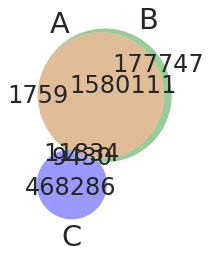

In [182]:
venn3([ncbi_articles, ncbi_oa_package, ncbi_manuscripts])

In [189]:
len(ncbi_manuscripts - ncbi_oa_package - ncbi_articles)

468286

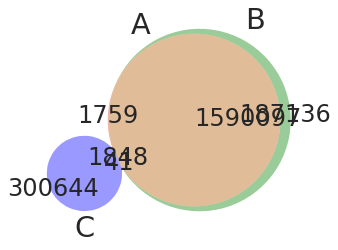

In [186]:
venn3([ncbi_articles, ncbi_oa_package, ebi_pmc_suppl_non_oa])

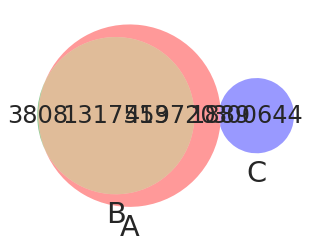

In [179]:
venn3([ncbi_oa_package, ebi_pmc_suppl_oa, ebi_pmc_suppl_non_oa])

In [180]:
len(ebi_pmc_suppl_oa - ncbi_oa_package)

3808

In [181]:
len(ncbi_oa_package - ebi_pmc_suppl_oa)

461609

In [88]:
list(ncbi_articles)[:10]

['World_J_Surg_Oncol/PMC2801667.nxml',
 'Sci_Rep/PMC5059719.nxml',
 'Plant_Methods/PMC4921008.nxml',
 'Lupus/PMC4107853.nxml',
 'BMC_Genet/PMC3849284.nxml',
 'Transl_Neurosci/PMC5017594.nxml',
 'Econ_Model/PMC2890861.nxml',
 'BMC_Geriatr/PMC4506459.nxml',
 'Emerg_Infect_Dis/PMC4622232.nxml',
 'Ind_Med_Gaz/PMC5196407.nxml']

In [90]:
list(ncbi_manuscripts)[:10]

['PMC0053XXXXX/PMC5380445.xml',
 'PMC0030XXXXX/PMC3032569.xml',
 'PMC0039XXXXX/PMC3999265.xml',
 'PMC0037XXXXX/PMC3709593.xml',
 'PMC0032XXXXX/PMC3291512.xml',
 'PMC0043XXXXX/PMC4384171.xml',
 'PMC0031XXXXX/PMC3122137.xml',
 'PMC0028XXXXX/PMC2863328.xml',
 'PMC0035XXXXX/PMC3556449.xml',
 'PMC0042XXXXX/PMC4268087.xml']